In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import netCDF4
from global_land_mask import globe
from scipy.optimize import curve_fit
import matplotlib as mpl
import nc_time_axis
mpl.rcParams['figure.dpi']= 300

In [23]:
a = '/media/rakshith/Seagate Expansion Drive/Good models/CESM2-WACCM/pr_Amon_CESM2-WACCM_historical_r1i1p1f1_gn_185001-201412.nc'
b = '/media/rakshith/Seagate Expansion Drive/Good models/CESM2-WACCM/pr_Amon_CESM2-WACCM_ssp585_r1i1p1f1_gn_201501-210012.nc'
c = '/media/rakshith/Seagate Expansion Drive/Good models/CESM2-WACCM/prw_Amon_CESM2-WACCM_historical_r1i1p1f1_gn_185001-201412.nc'
d = '/media/rakshith/Seagate Expansion Drive/Good models/CESM2-WACCM/prw_Amon_CESM2-WACCM_ssp585_r1i1p1f1_gn_201501-210012.nc'

pr = [a,b]
prw = [c,d]
cesmpr = xr.open_mfdataset(pr)
cesmprw = xr.open_mfdataset(prw)
cesm = cesmpr.merge(cesmprw, compat='override')

/home/rakshith/miniconda3/envs/myenv/lib/python3.10/site-packages/xarray/conventions.py:523: SerializationWarning: variable 'pr' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/home/rakshith/miniconda3/envs/myenv/lib/python3.10/site-packages/xarray/conventions.py:523: SerializationWarning: variable 'prw' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [ ]:
model5 = '/media/rakshith/Seagate Expansion Drive/Good models/NESM3/*.nc'
nesm = xr.open_mfdataset(model5)

model6 = '/media/rakshith/Seagate Expansion Drive/Good models/BCC-CSM2-MR/*.nc'
bcc = xr.open_mfdataset(model6)

model7 = '/media/rakshith/Seagate Expansion Drive/Good models/E3SM-1-0/*.nc'
e3sm = xr.open_mfdataset(model7)

model8 = '/media/rakshith/Seagate Expansion Drive/Good models/GFDL-ESM4/*.nc'
gfdl = xr.open_mfdataset(model8)

model9 = '/media/rakshith/Seagate Expansion Drive/Good models/IPSL-CM6A-LR/*.nc'
ipsl = xr.open_mfdataset(model9)

model10 = '/media/rakshith/Seagate Expansion Drive/Good models/MRI-ESM2-0/*.nc'
mri = xr.open_mfdataset(model10)

h = '/media/rakshith/Seagate Expansion Drive/mraks/TGMS ERA 1959-2021, India only.nc'
ds = xr.open_dataset(h)

In [2]:
model2 = '/media/rakshith/Seagate Expansion Drive/Good models/CMCC/*.nc'
cmcc = xr.open_mfdataset(model2)

model3 = '/media/rakshith/Seagate Expansion Drive/Good models/INM-CM5-0/*.nc'
inm = xr.open_mfdataset(model3)

model4 = '/media/rakshith/Seagate Expansion Drive/Good models/MIROC6/*.nc'
miroc = xr.open_mfdataset(model4)

# Seasonal cycle comparison

In [6]:
year=input('Enter a year between 1959-2014 to compare\n')

Enter a year between 1959-2014 to compare
2014


In [7]:
grid1 = cmcc.sel(time=year, lat=slice(10,30), lon=slice(70,90))
grid2 = nesm.sel(time=year, lat=slice(10,30), lon=slice(70,90))
grid3 = miroc.sel(time=year, lat=slice(10,30), lon=slice(70,90))
ds2 = ds.sel(time=year)

In [8]:
lon_grid1, lat_grid1 = np.meshgrid(grid1.lon, grid1.lat)
mask1 = globe.is_land(lat_grid1, lon_grid1)
lon_grid2, lat_grid2 = np.meshgrid(grid2.lon, grid2.lat)
mask2 = globe.is_land(lat_grid2, lon_grid2)
lon_grid3, lat_grid3 = np.meshgrid(grid3.lon, grid3.lat)
mask3 = globe.is_land(lat_grid3, lon_grid3)
#ERA mask
lon_grid, lat_grid = np.meshgrid(ds.longitude, ds.latitude)
eramask = globe.is_land(lat_grid, lon_grid)

In [9]:
Pwat1 = grid1.prw.where(mask1>0).mean(dim=['lat', 'lon']).squeeze()
Pr1 = 86400*grid1.pr.where(madsk1>0).mean(dim=['lat', 'lon']).squeeze()
Pwat2 = grid2.prw.where(mask2>0).mean(dim=['lat', 'lon']).squeeze()
Pr2 = 86400*grid2.pr.where(mask2>0).mean(dim=['lat', 'lon']).squeeze()
Pwat3 = grid3.prw.where(mask3>0).mean(dim=['lat', 'lon']).squeeze()
Pr3 = 86400*grid3.pr.where(mask3>0).mean(dim=['lat', 'lon']).squeeze()

ds3 = ds2.where(eramask>0).mean(dim=['longitude', 'latitude']).squeeze()

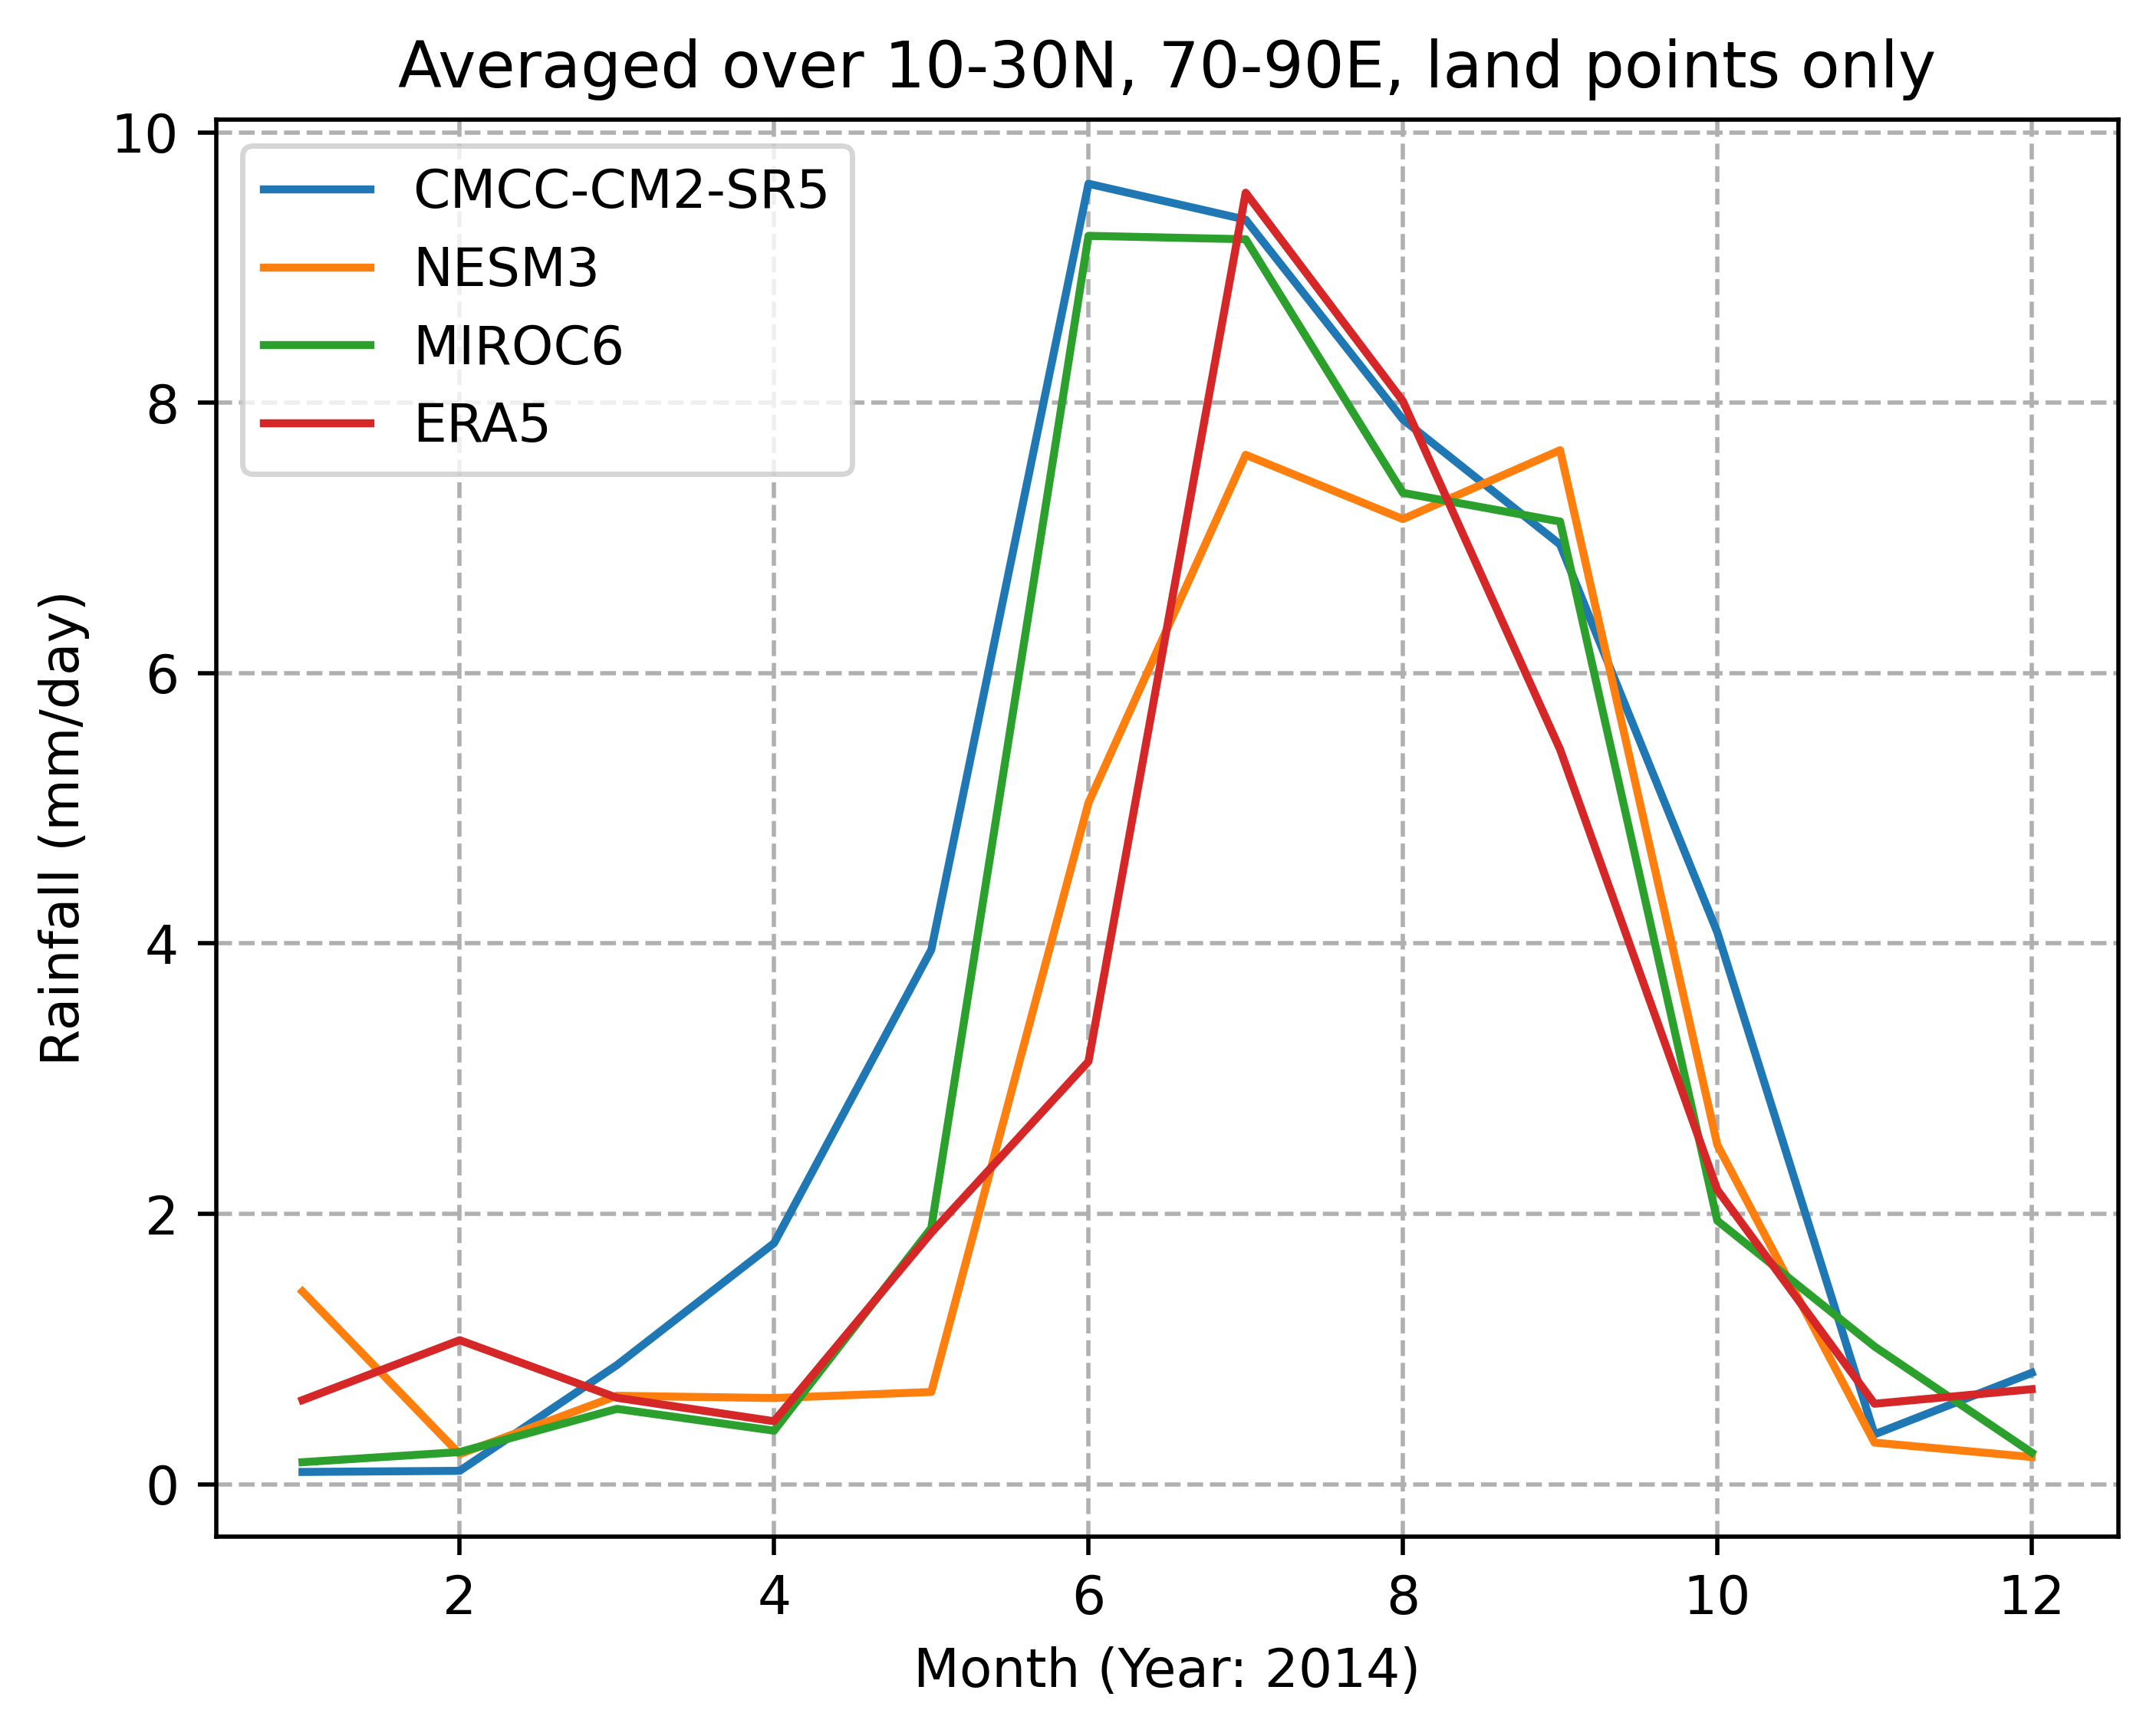

In [10]:
X = np.linspace(1, 12, 12, dtype='int')
plt.plot(X, Pr1, label='CMCC-CM2-SR5')
plt.plot(X, Pr2, label='NESM3')
plt.plot(X, Pr3, label='MIROC6')
plt.plot(X, 86400*ds3.mtpr, label='ERA5')
plt.legend()
plt.title('Averaged over 10-30N, 70-90E, land points only')
plt.xlabel('Month (Year: '+year+')')
plt.ylabel('Rainfall (mm/day)')
plt.grid(linestyle='--')

# P vs Pwat plot

In [3]:
data=miroc #select model to compare
#Name = 'INM-CM5-0'
Name = 'CMCC-CM2-SR5'

In [4]:
region = str(input('Enter the region for comparision\n I=India, Af=South Africa, Am=South America\n'))
                   
if region=='I':
        lat1, lat2, lon1, lon2 = 10, 30, 70, 90
        region='India'
elif region=='Af':
        lat1, lat2, lon1, lon2 = -20, -5, 20, 40
        region='South Africa'
elif region=='Am':
        lat1, lat2, lon1, lon2 = -20, -10, 290, 310
        region='South America'
else:
    print('Please enter proper code')

Enter the region for comparision
 I=India, Af=South Africa, Am=South America
I


In [14]:
#For JJAS
#jjas = data.time.dt.month.isin(range(6, 10))
#clim = data.sel(time=jjas) #ds with only JJAS months
#For all months
clim=data
clim2 = clim.sel(lat=slice(lat1,lat2), lon=slice(lon1,lon2))

In [15]:
year1='1959'
year2='1968'
year3='2012'
year4='2021'
grid1 = clim2.sel(time=slice(year1, year2))
grid2 = clim2.sel(time=slice(year3, year4))
    
l=[]
for i in grid1.lon:
    if i>180:
        l.append(i-360)
    else:
        l.append(i)
            
lon_grid, lat_grid = np.meshgrid(l, grid1.lat)
mask = globe.is_land(lat_grid, lon_grid)

In [16]:
#Qdiv1 = grid1.rsdt.where(mask>0).mean(dim=['lat', 'lon']) - grid1.rsut.where(mask>0).mean(dim=['lat', 'lon']) - grid1.rlut.where(mask>0).mean(dim=['lat', 'lon'])
#Qdiv2 = grid2.rsdt.where(mask>0).mean(dim=['lat', 'lon']) - grid2.rsut.where(mask>0).mean(dim=['lat', 'lon']) - grid2.rlut.where(mask>0).mean(dim=['lat', 'lon'])

In [17]:
Pwat1 = grid1.prw.where(mask>0).mean(dim=['lat', 'lon']).squeeze()
Pr1 = 86400*grid1.pr.where(mask>0).mean(dim=['lat', 'lon']).squeeze()
Pwat2 = grid2.prw.where(mask>0).mean(dim=['lat', 'lon']).squeeze()
Pr2 = 86400*grid2.pr.where(mask>0).mean(dim=['lat', 'lon']).squeeze()

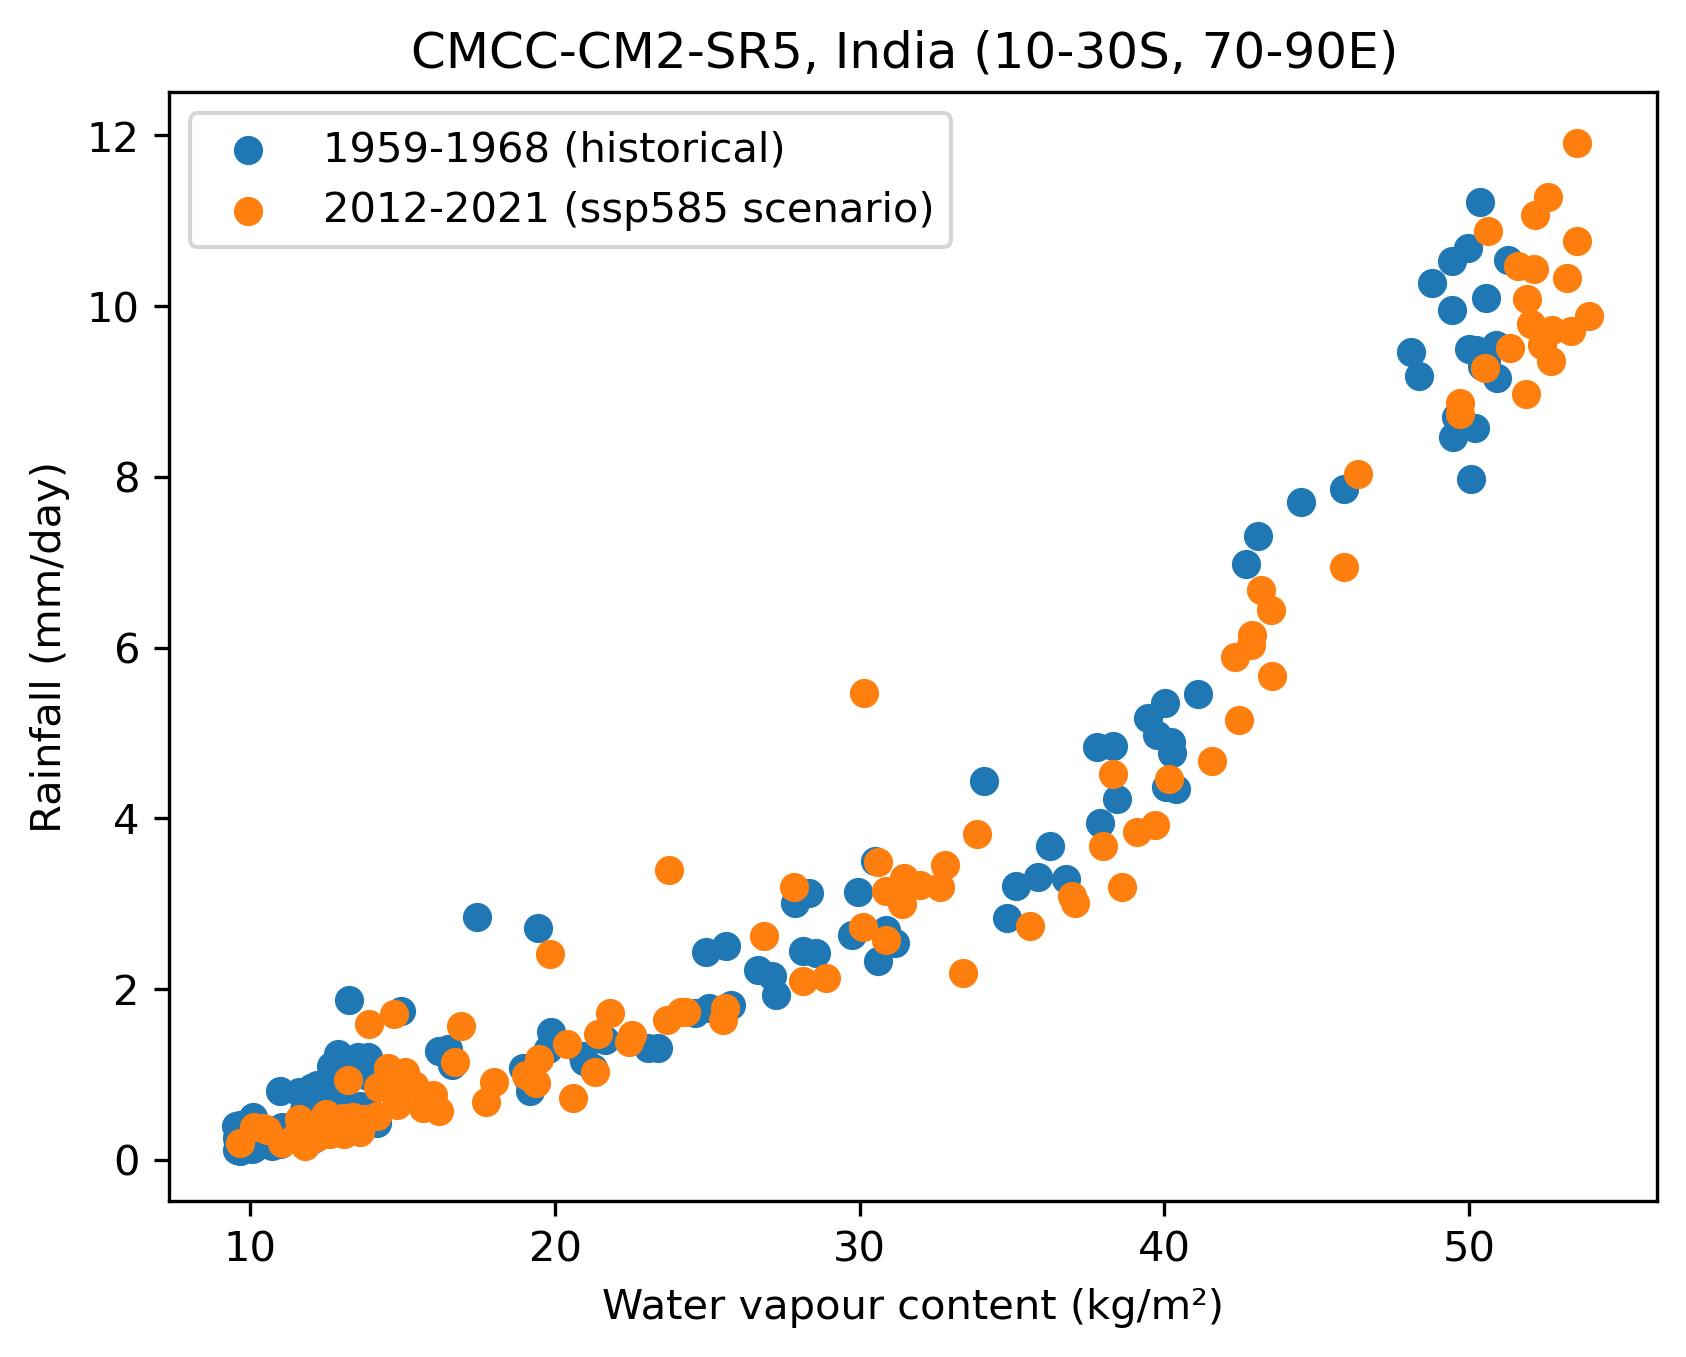

In [18]:
plt.scatter(Pwat1, Pr1, label=year1 + '-' + year2 + ' (historical)')
plt.scatter(Pwat2, Pr2, label=year3 + '-' + year4 + ' (ssp585 scenario)')
plt.xlabel('Water vapour content (kg/m\u00b2)')
plt.ylabel('Rainfall (mm/day)')
plt.title(Name + ', ' + region + " ({}-{}S, {}-{}E) ".format(abs(lat1), abs(lat2), abs(lon1), abs(lon2)))
#plt.title('Only months June-September')
plt.legend()
plt.show()

# All regions together comparision

In [40]:
lat1, lat2, lon1, lon2 = 10, 30, 70, 90
lat3, lat4, lon3, lon4 = -20, -5, 20, 40 # South Africa
lat5, lat6, lon5, lon6 = -20, -10, 290, 310 # South America

In [41]:
clim=inm

year1, year2='1990','2010'
#year1, year2='2070','2090'

grid1 = clim.sel(time=slice(year1, year2))

ind = grid1.sel(lat=slice(lat1,lat2), lon=slice(lon1,lon2))
af = grid1.sel(lat=slice(lat3,lat4), lon=slice(lon3,lon4))
am = grid1.sel(lat=slice(lat5,lat6), lon=slice(lon5,lon6))

l=[]
for i in am.lon:
    if i>180:
        l.append(i-360)
    else:
        l.append(i)
            
lon_grid, lat_grid = np.meshgrid(ind.lon, ind.lat)
indmask = globe.is_land(lat_grid, lon_grid)

lon_grid, lat_grid = np.meshgrid(af.lon, af.lat)
afmask = globe.is_land(lat_grid, lon_grid)

lon_grid, lat_grid = np.meshgrid(l, am.lat)
ammask = globe.is_land(lat_grid, lon_grid)

In [42]:
Pw1 = ind.prw.where(indmask>0).mean(dim=['lat', 'lon']).squeeze()
P1 = 86400*ind.pr.where(indmask>0).mean(dim=['lat', 'lon']).squeeze()

Pw2 = af.prw.where(afmask>0).mean(dim=['lat', 'lon']).squeeze()
P2 = 86400*af.pr.where(afmask>0).mean(dim=['lat', 'lon']).squeeze()

Pw3 = am.prw.where(ammask>0).mean(dim=['lat', 'lon']).squeeze()
P3 = 86400*am.pr.where(ammask>0).mean(dim=['lat', 'lon']).squeeze()

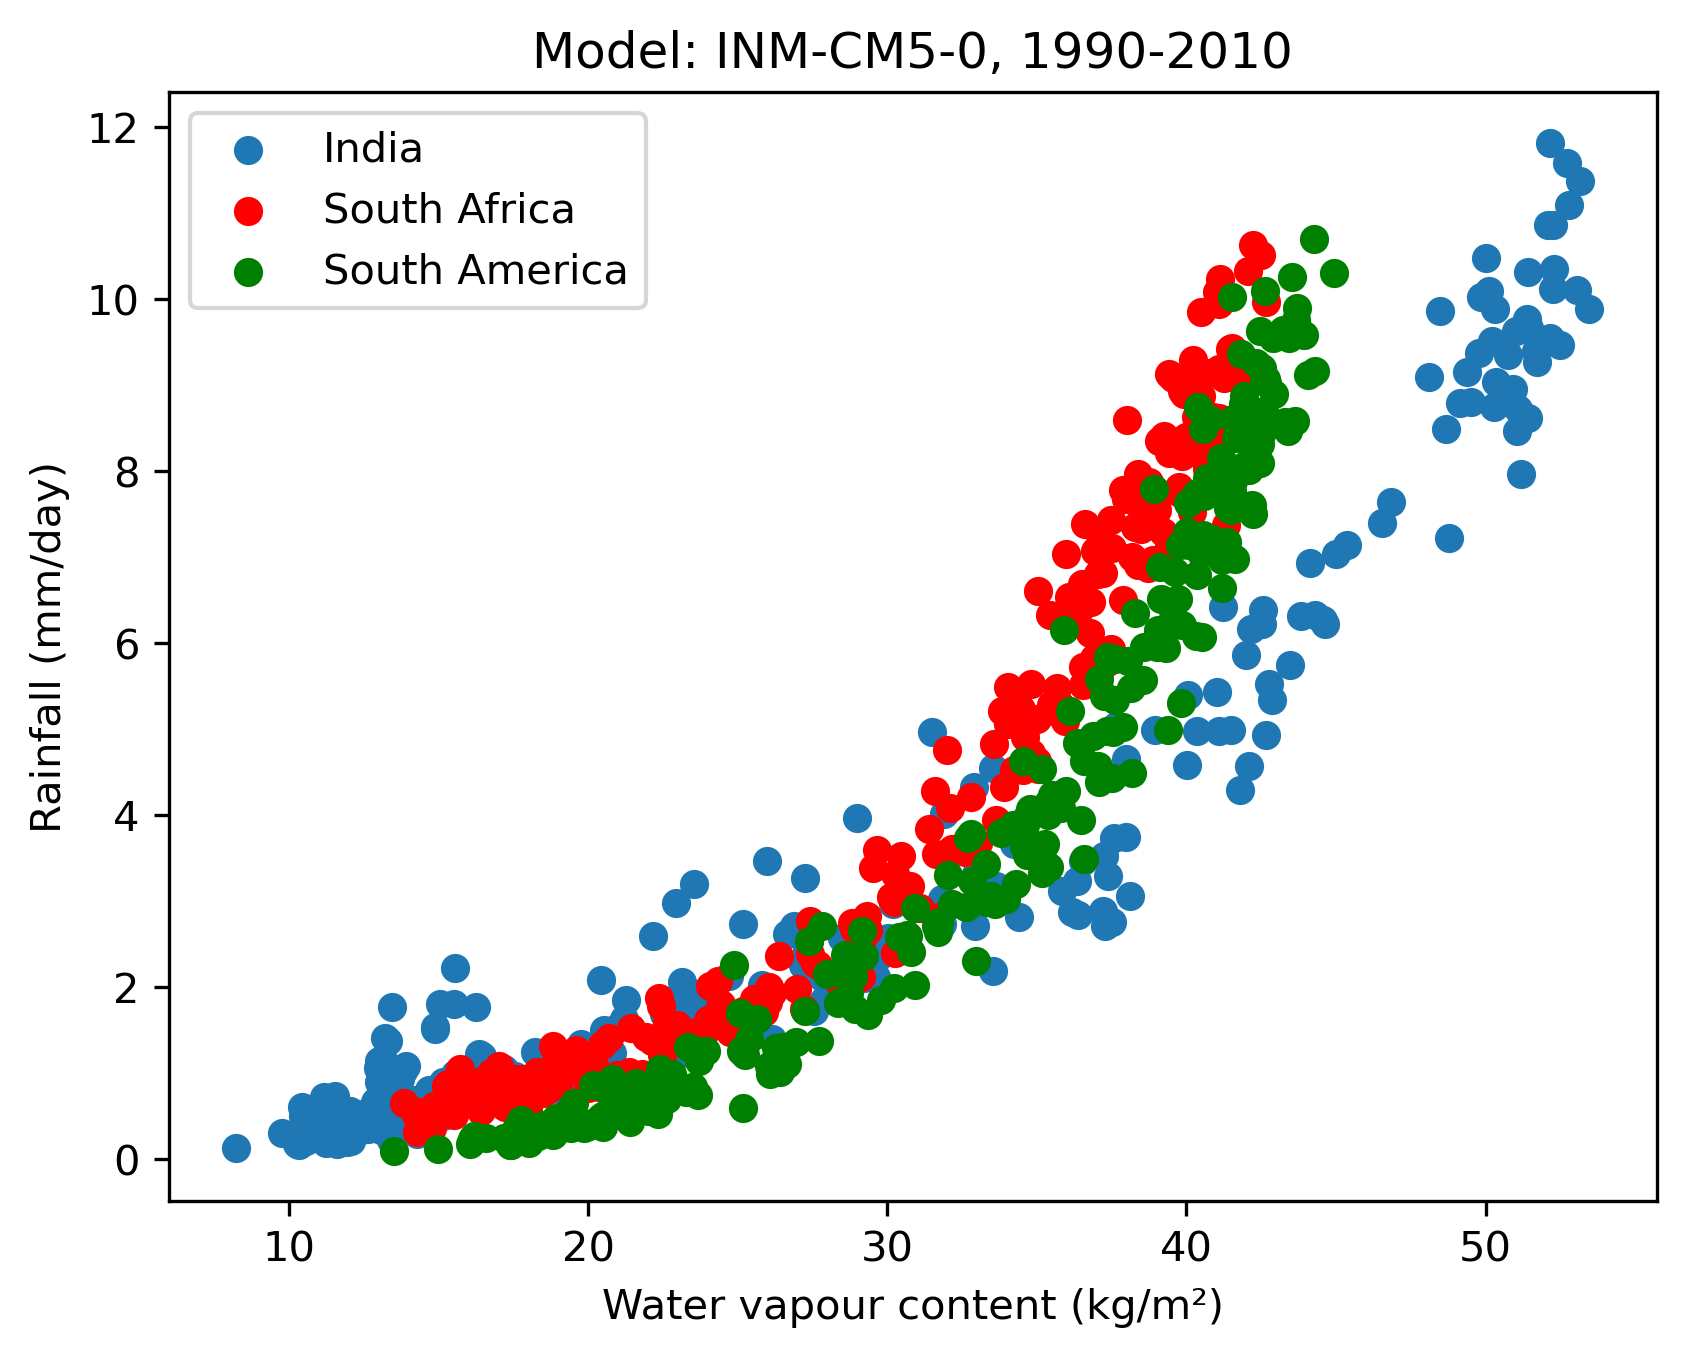

In [43]:
plt.scatter(Pw1, P1, label='India')
plt.scatter(Pw2, P2, label='South Africa', c='r')
plt.scatter(Pw3, P3, label='South America', c='g')
plt.xlabel('Water vapour content (kg/m\u00b2)')
plt.ylabel('Rainfall (mm/day)')
plt.title('Model: INM-CM5-0, '+year1+'-'+year2 )
#plt.title(Name + ', ' + region + " ({}-{}S, {}-{}E) ".format(abs(lat1), abs(lat2), abs(lon1), abs(lon2)))
plt.legend()
plt.show()

# Constant values

In [26]:
grid1 = data.sel(lat=slice(10,30), lon=slice(70,90))

In [27]:
#months = grid1.time.dt.month.isin(range(6, 10))
#JJAS = grid1.sel(time=months) 
JJAS = grid1

In [28]:
#JJAS = JJAS.resample(time="1Y").mean()

In [29]:
#datetimeindex = JJAS.indexes['time'].to_datetimeindex()
#JJAS['time'] = datetimeindex

In [30]:
lon_grid1, lat_grid1 = np.meshgrid(grid1.lon, grid1.lat)
mask1 = globe.is_land(lat_grid1, lon_grid1)

In [31]:
year1='1990'
year2='2010'
year3='2070'
year4='2090'
ypwat = JJAS.prw.where(mask1>0).mean(dim=['lat', 'lon'])
yp = 86400*28.96*(JJAS.pr.where(mask1>0).mean(dim=['lat', 'lon'])-JJAS.evspsbl.where(mask1>0).mean(dim=['lat', 'lon']))
yq = JJAS.rsdt.where(mask1>0).mean(dim=['lat', 'lon']) - JJAS.rsut.where(mask1>0).mean(dim=['lat', 'lon']) - JJAS.rlut.where(mask1>0).mean(dim=['lat', 'lon'])
ypr = 86400*28.96*(JJAS.pr.where(mask1>0).mean(dim=['lat', 'lon']))
TGMS = np.divide(yq, yp)
yrec = np.divide(1, ypwat)

In [32]:
TGMS1 = TGMS.sel(time=slice(year1, year2))
TGMS2 = TGMS.sel(time=slice(year3, year4))
ypwat1 = ypwat.sel(time=slice(year1, year2))
ypwat2 = ypwat.sel(time=slice(year3, year4))
year5='2030'
year6='2050'
TGMS3 = TGMS.sel(time=slice(year5, year6))
ypwat3 = ypwat.sel(time=slice(year5, year6))

In [33]:
yrec1 = yrec.sel(time=slice(year1, year2))
yrec2 = yrec.sel(time=slice(year3, year4))
yrec3 = yrec.sel(time=slice(year5, year6))

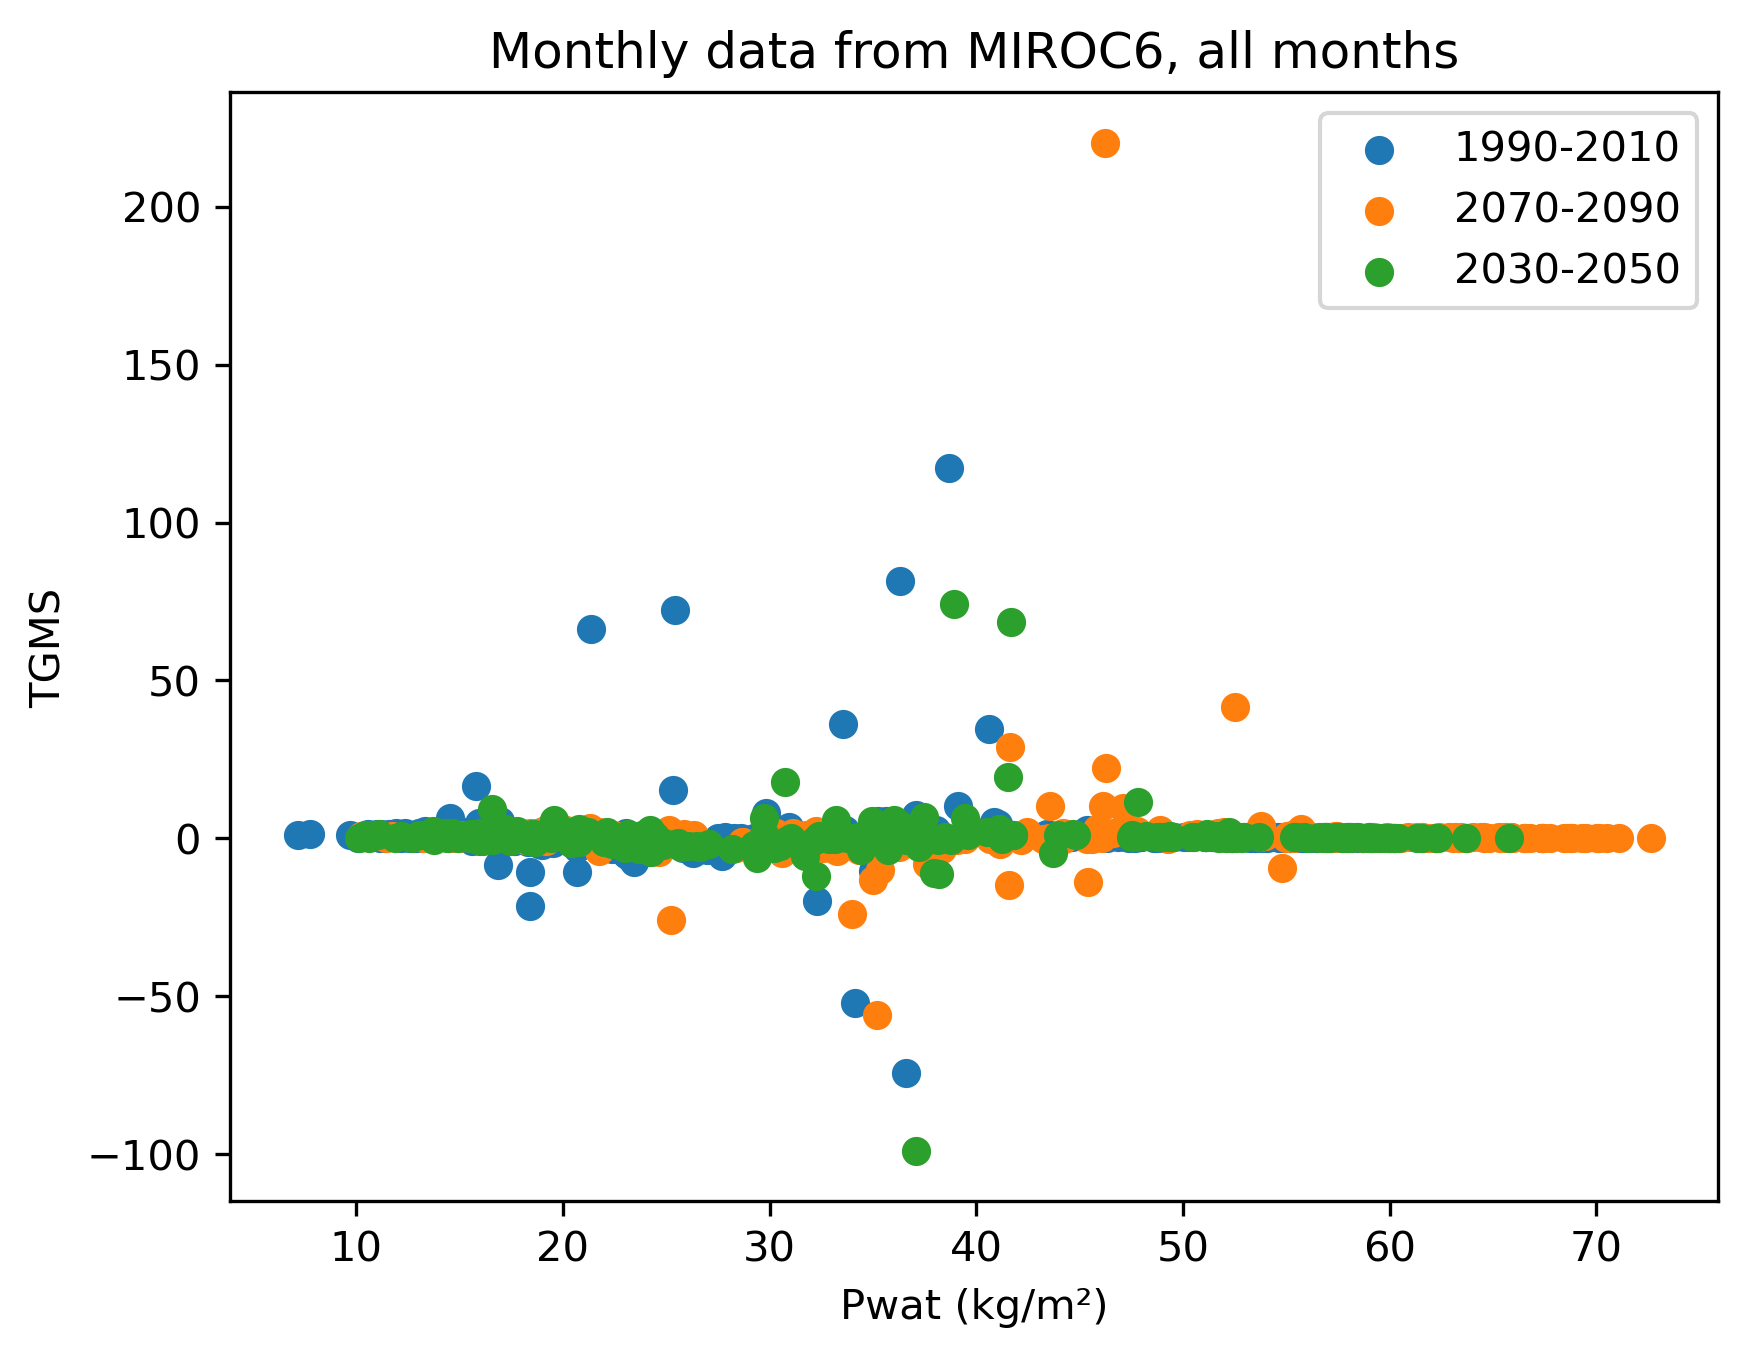

In [37]:
plt.scatter(ypwat1.values, TGMS1.values)
plt.scatter(ypwat2.values, TGMS2.values)
plt.scatter(ypwat3.values, TGMS3.values)
plt.ylabel('TGMS')
#plt.ylim(0,5)
plt.xlabel('Pwat (kg/m\u00b2)')
plt.title('Monthly data from MIROC6, all months')
plt.legend(['1990-2010','2070-2090', '2030-2050'])

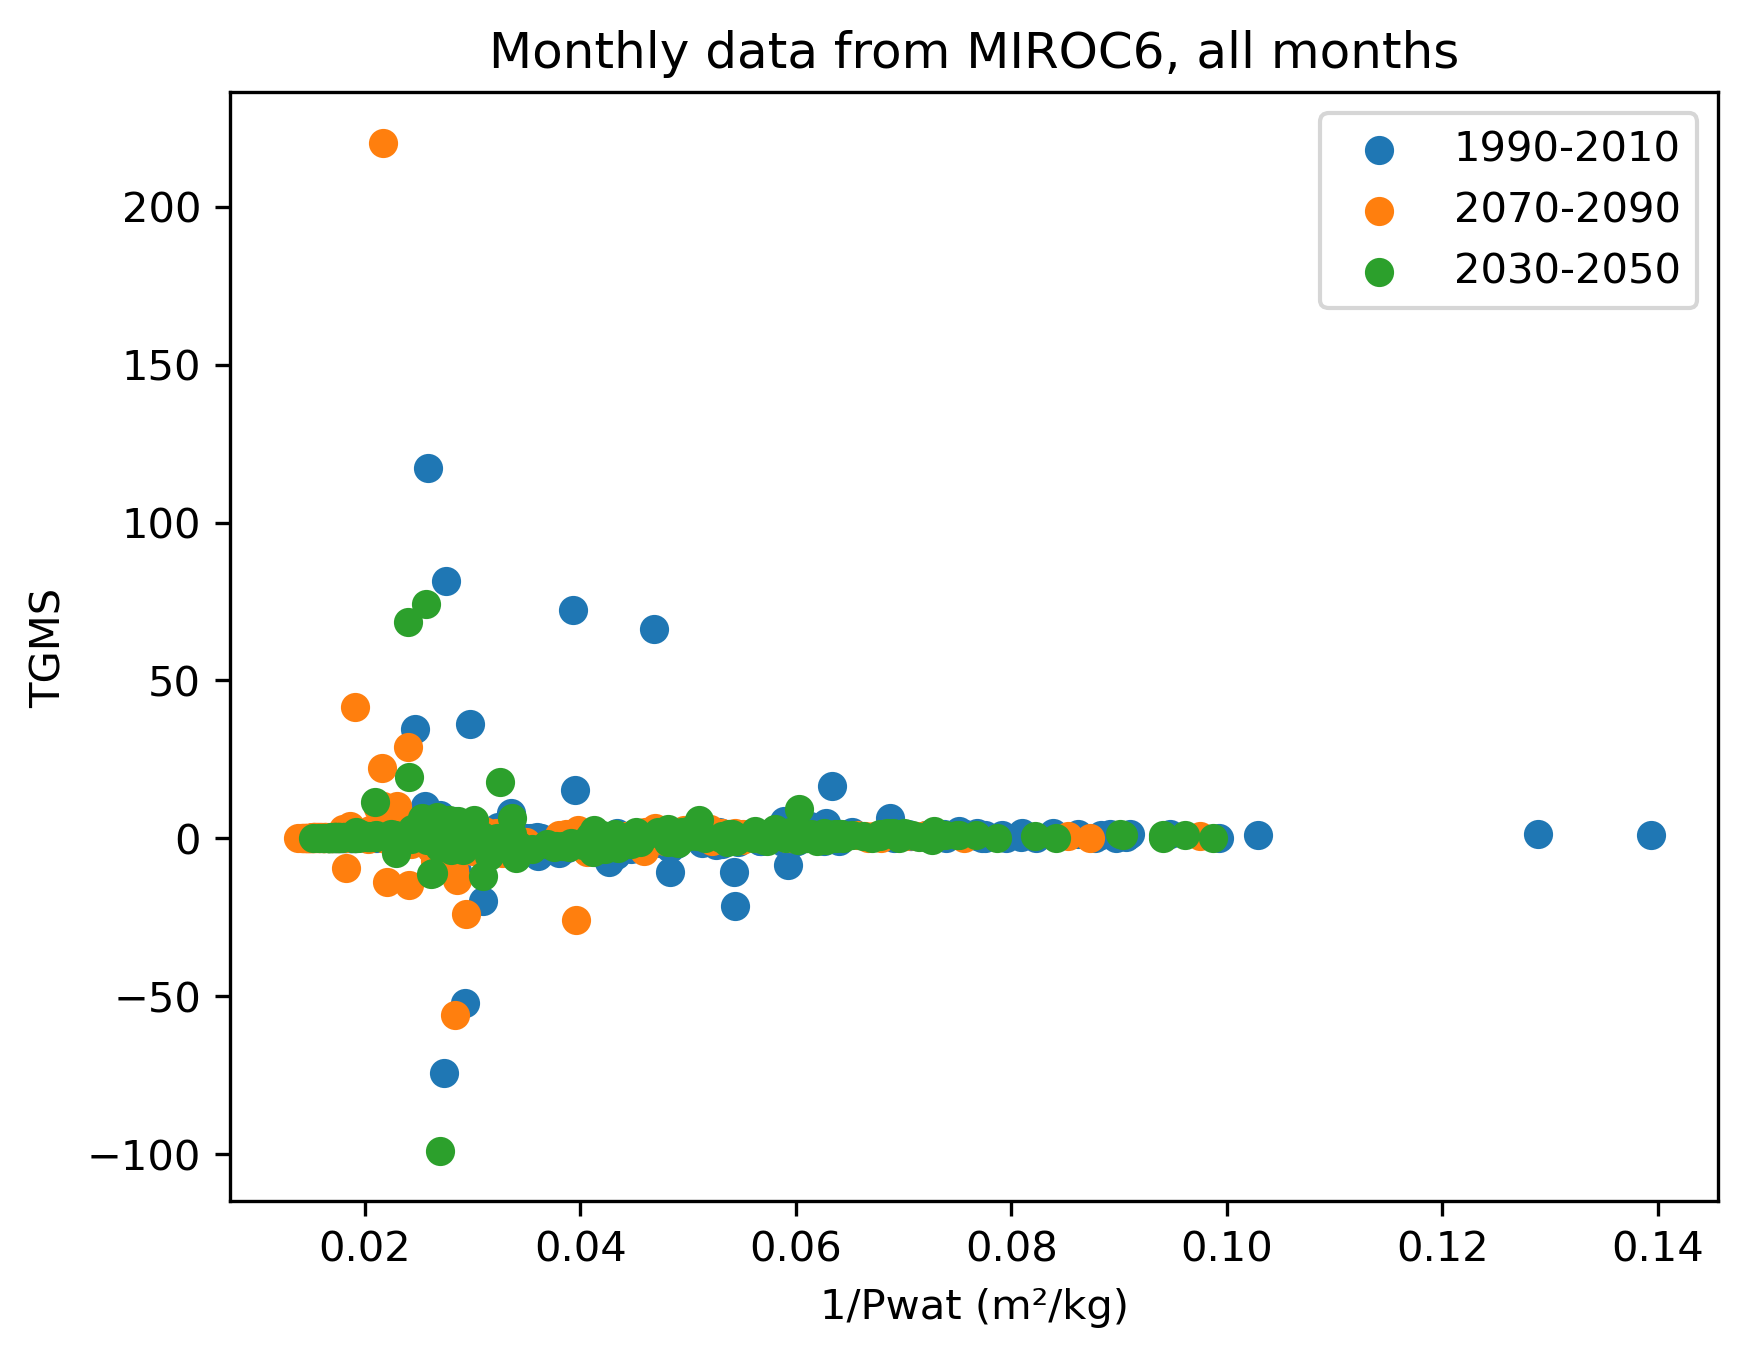

In [39]:
plt.scatter(yrec1, TGMS1)
plt.scatter(yrec2, TGMS2)
plt.scatter(yrec3, TGMS3)
#plt.ylim(0,2.5)
plt.ylabel('TGMS')
plt.xlabel('1/Pwat (m\u00b2/kg)')
plt.title('Monthly data from MIROC6, all months')
plt.legend(['1990-2010','2070-2090', '2030-2050'])

In [88]:
from sklearn.linear_model import LinearRegression

In [89]:
x1, y1 = yrec1.values.reshape(-1, 1), TGMS1.values.reshape(-1, 1)
x2, y2 = yrec2.values.reshape(-1, 1), TGMS2.values.reshape(-1, 1)

In [90]:
regr = LinearRegression()
  
regr.fit(x1, y1)
y_pred1 = regr.predict(x1)
print("Intercept:", regr.intercept_)
print("Coefficients:", regr.coef_)
c1 = regr.coef_[0][0]
c2 = regr.intercept_[0]

regr.fit(x2, y2)
y_pred2 = regr.predict(x2)
print("Intercept:", regr.intercept_)
print("Coefficients:", regr.coef_)
c3 = regr.coef_[0][0]
c4 = regr.intercept_[0]

Intercept: [-50.392708]
Coefficients: [[2646.6772]]
Intercept: [-11.222315]
Coefficients: [[741.05096]]


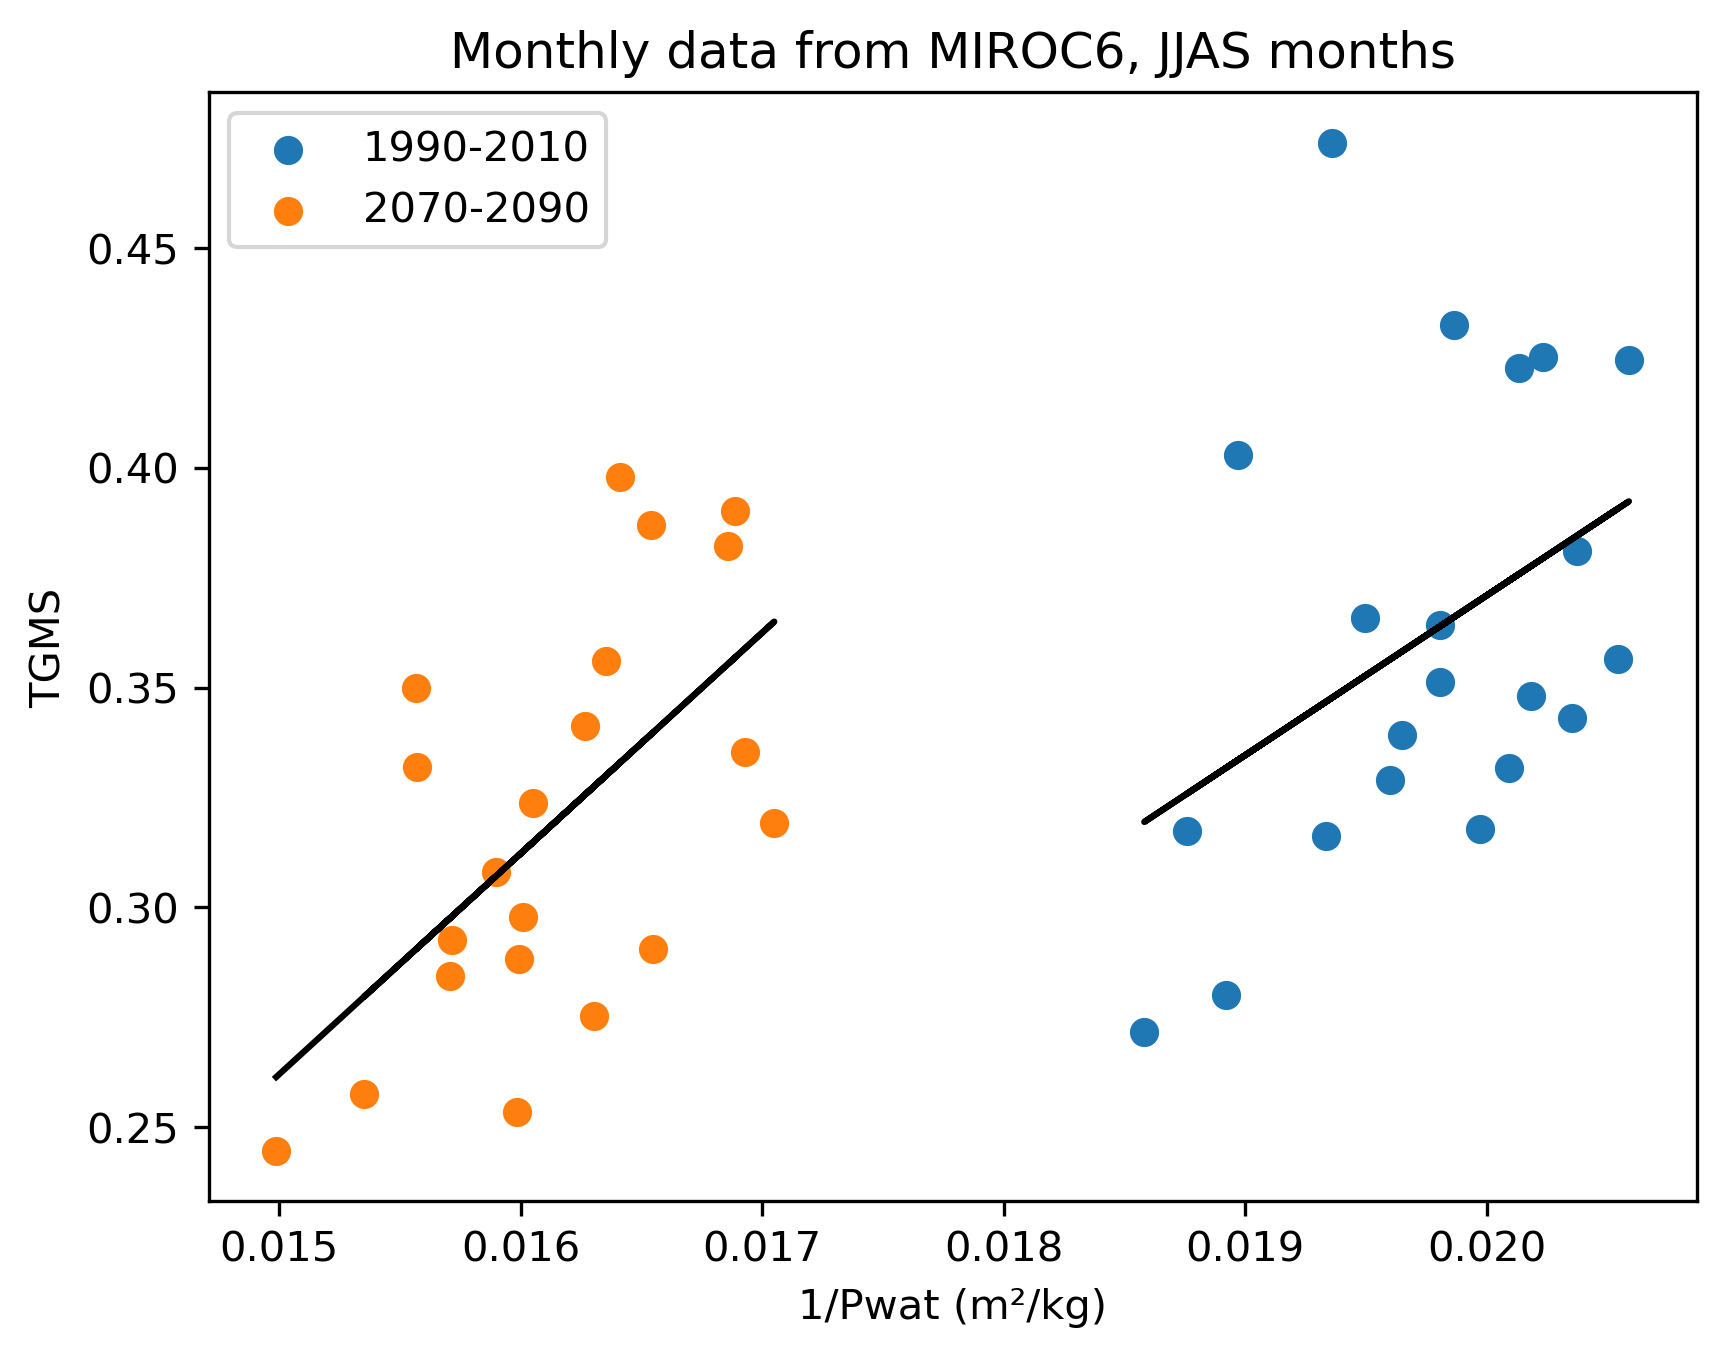

In [45]:
plt.scatter(yrec1, TGMS1)
plt.scatter(yrec2, TGMS2)
plt.plot(x1, y_pred1, color ='k')
plt.plot(x2, y_pred2, color ='k')
plt.ylabel('TGMS')
plt.xlabel('1/Pwat (m\u00b2/kg)')
plt.title('Monthly data from MIROC6, JJAS months')
plt.legend(['1990-2010','2070-2090'])

# Decadal stats

In [11]:
clim=JJAS.resample(time="10AS").mean()

In [12]:
Pwat = clim.prw.where(mask1>0).mean(dim=['lat', 'lon'])
P = 86400*28.96*((clim.pr.where(mask1>0).mean(dim=['lat', 'lon'])-clim.evspsbl.where(mask1>0).mean(dim=['lat', 'lon'])))
Qdiv = clim.rsdt.where(mask1>0).mean(dim=['lat', 'lon']) - clim.rsut.where(mask1>0).mean(dim=['lat', 'lon']) - clim.rlut.where(mask1>0).mean(dim=['lat', 'lon'])
E = 86400*28.96*(clim.evspsbl.where(mask1>0).mean(dim=['lat', 'lon']))
Pr = 86400*28.96*(clim.pr.where(mask1>0).mean(dim=['lat', 'lon']))

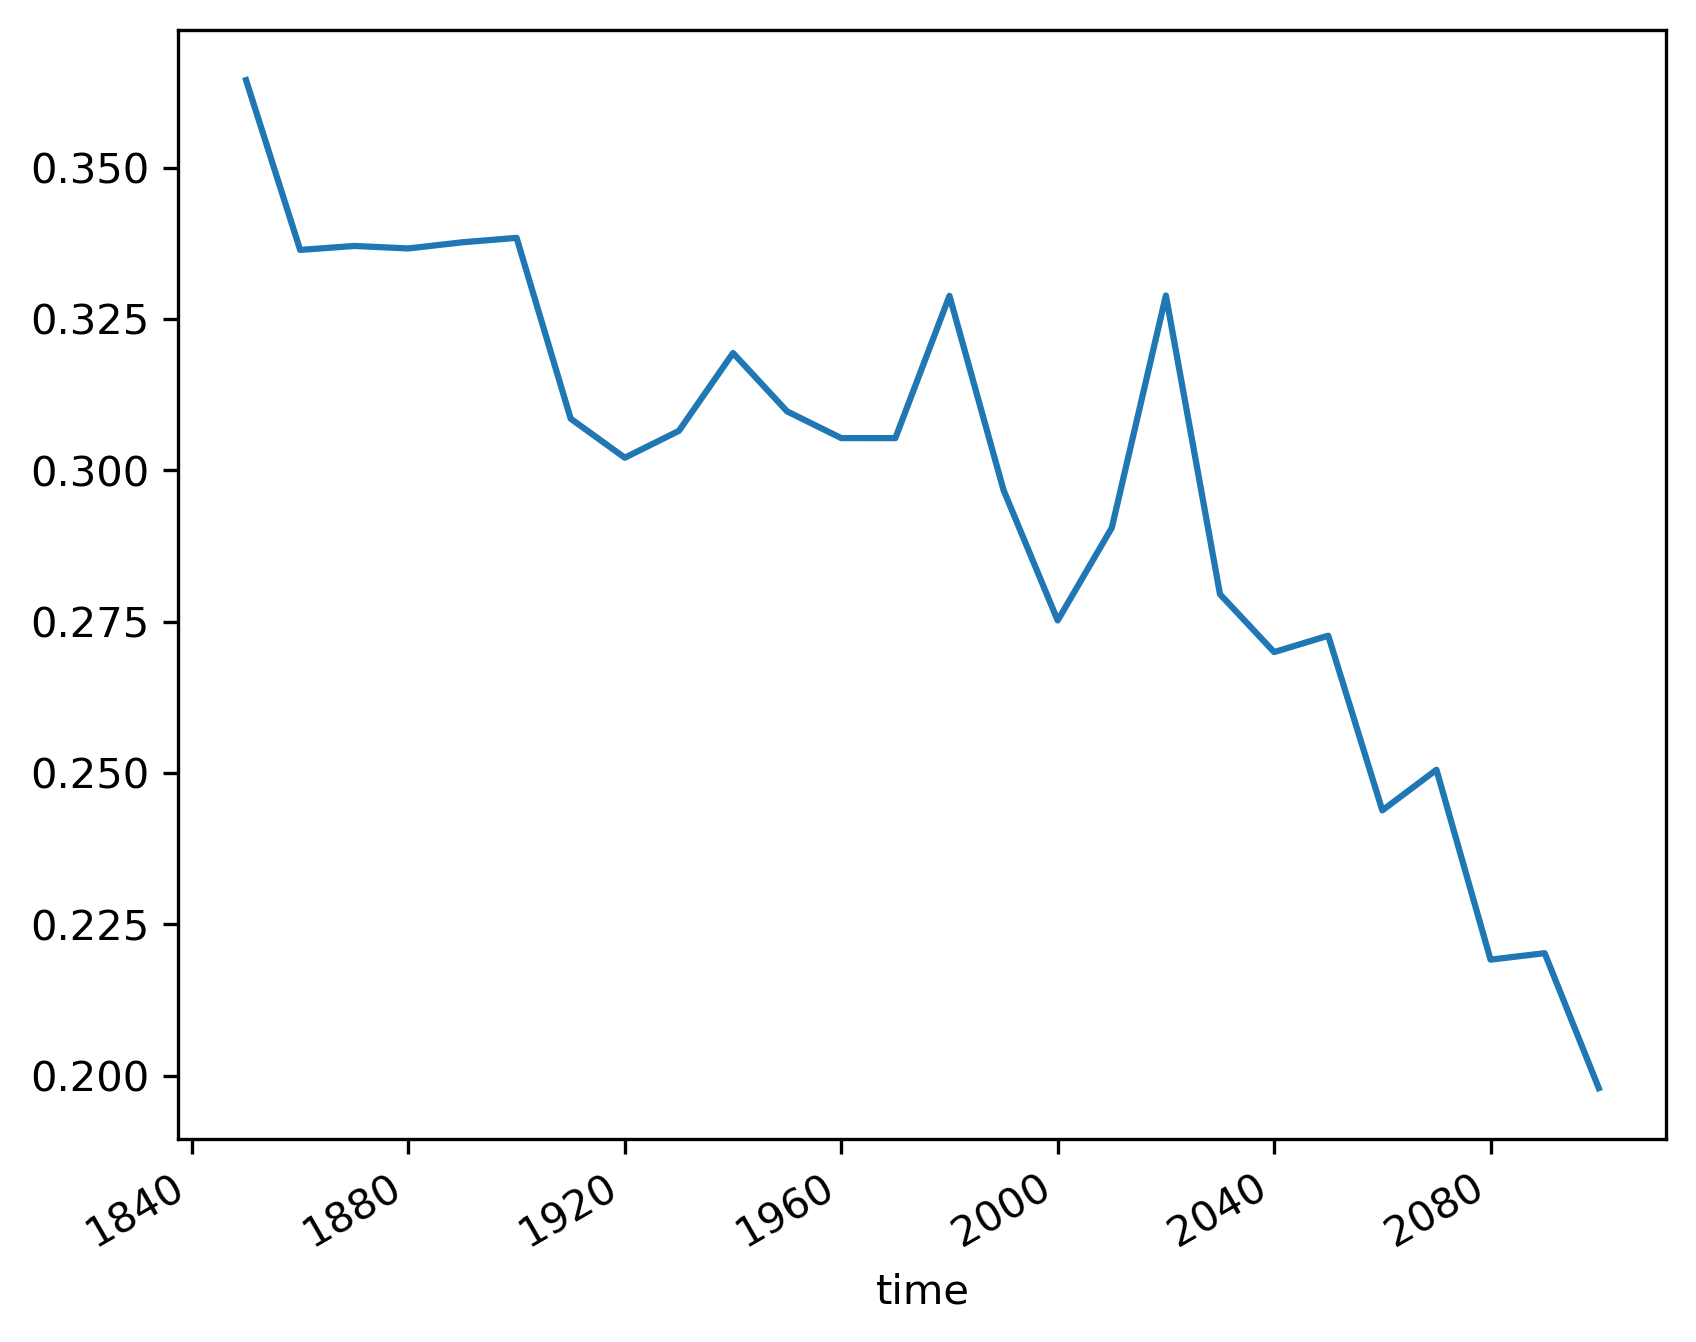

In [10]:
TGMS = np.divide(Qdiv, P)
TGMS.plot()

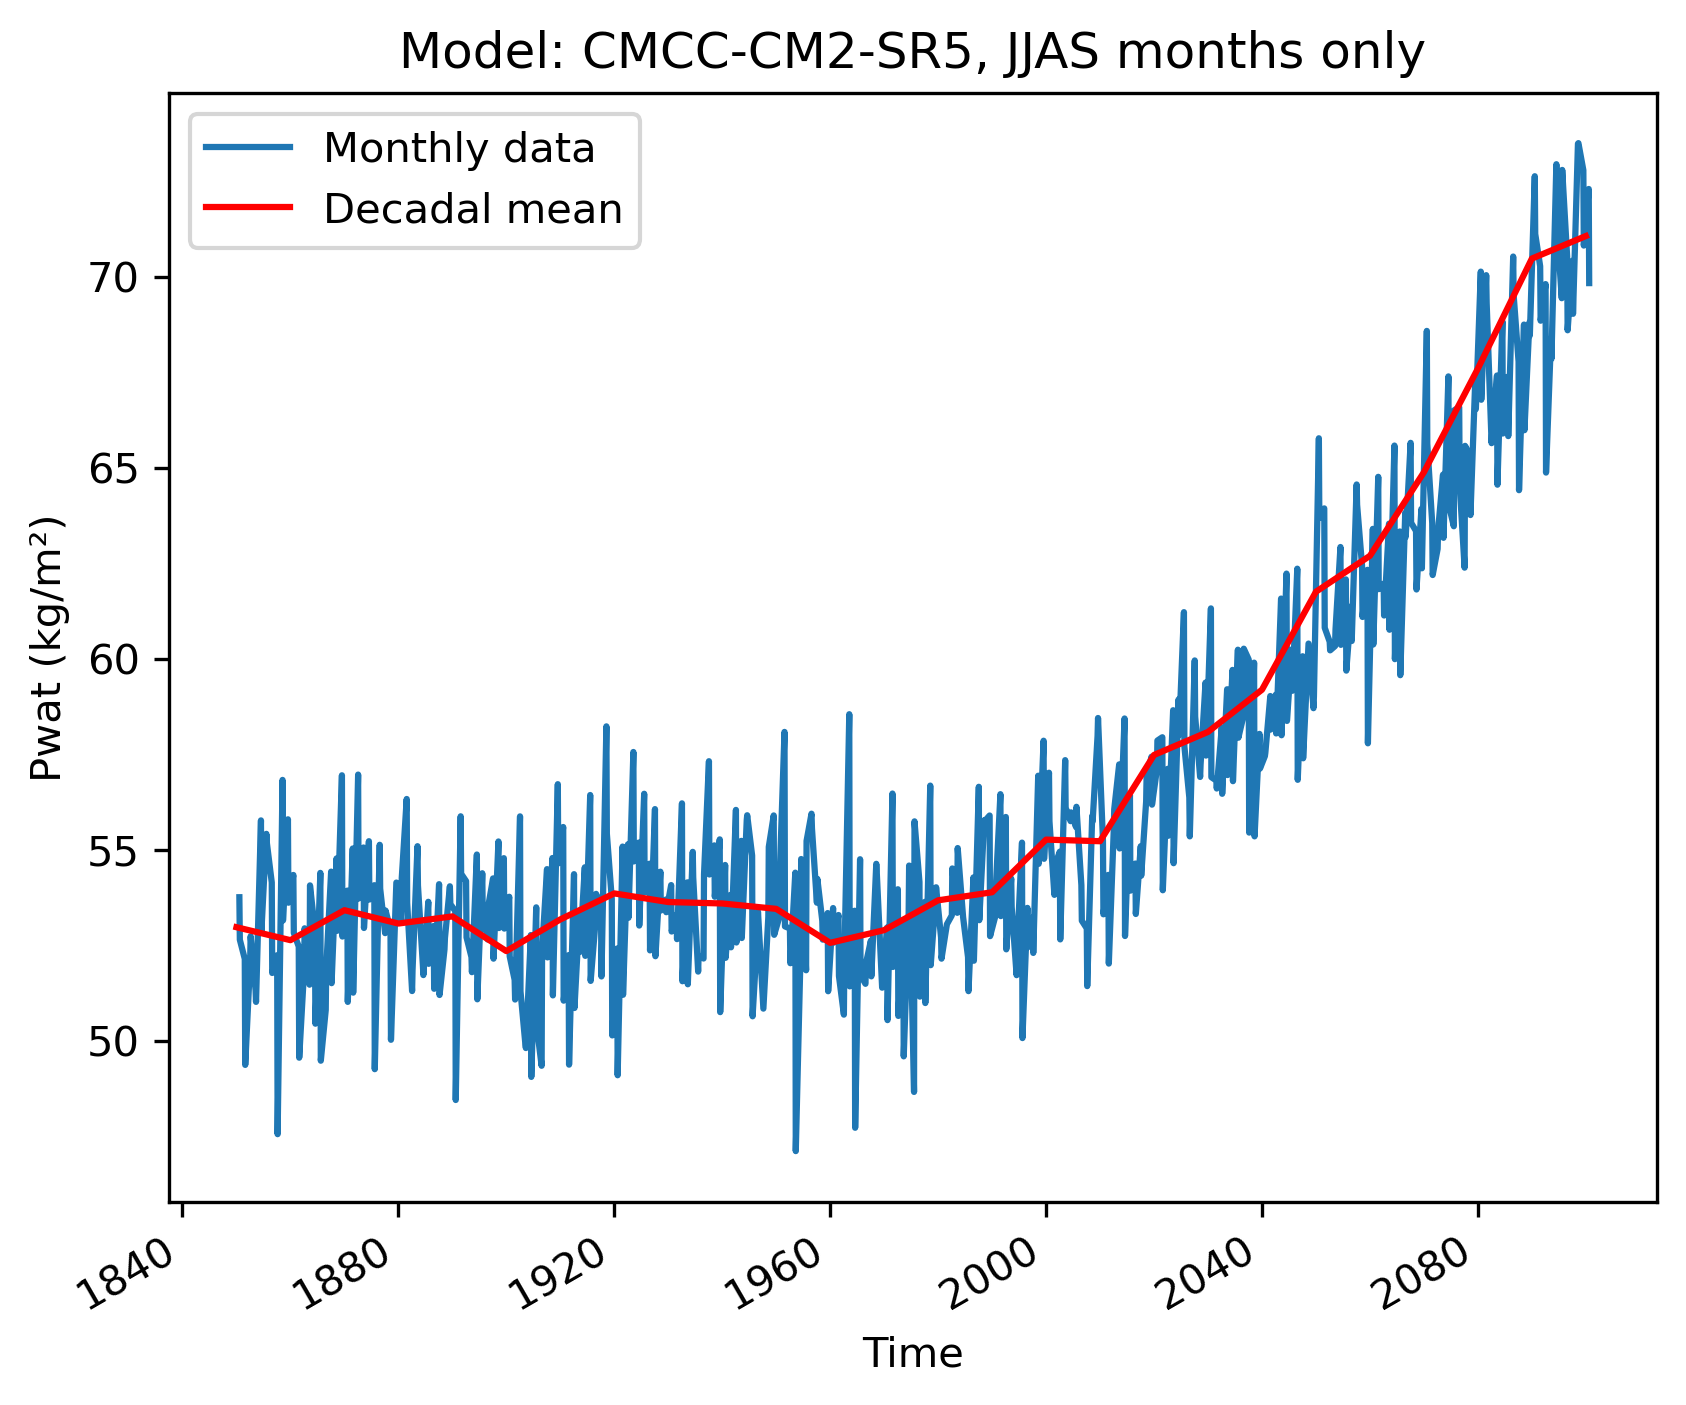

In [17]:
ypwat.plot(label='Monthly data')
Pwat.plot(c='r', label='Decadal mean')
plt.ylabel('Pwat (kg/m\u00b2)')
plt.xlabel('Time')
plt.title('Model: CMCC-CM2-SR5, JJAS months only')
plt.legend()

In [91]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
x = X.reshape(-1, 1)
y = out.reshape(-1, 1)
regr.fit(x, y)
y_pred = regr.predict(x)

In [92]:
def pred(e,qnet,pwat,c):
    return e + qnet * pwat/(c-pwat)

pred1 = pred(E.values, Qdiv.values, Pwat.values, out)

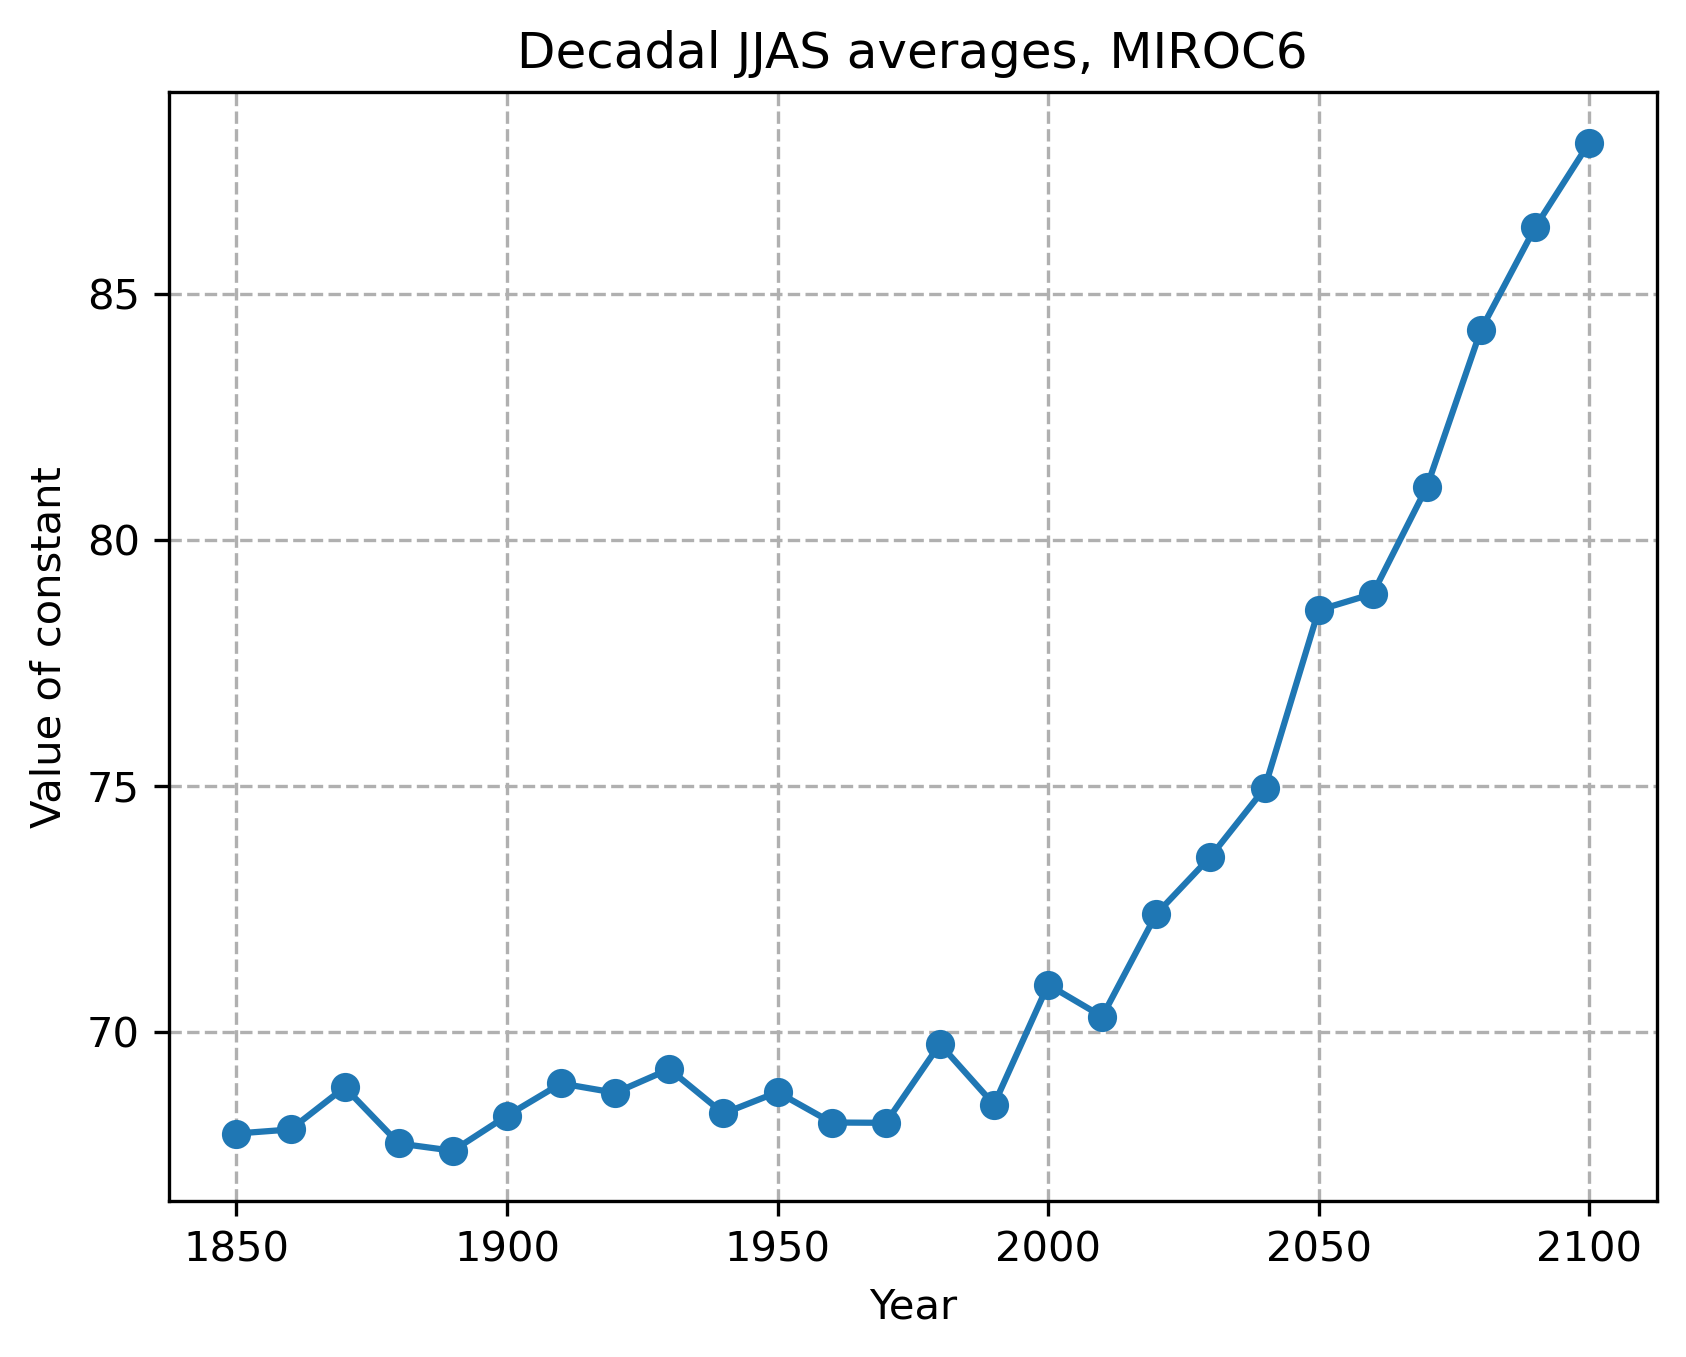

In [93]:
plt.plot(X, out, marker='o')
#plt.plot(X, y_pred, c='r', linestyle='--')
#plt.xticks(X, X, rotation = 90)
plt.ylabel('Value of constant')
plt.xlabel('Year')
plt.title('Decadal JJAS averages, MIROC6')
plt.grid(linestyle='--')
#plt.figtext(0.6, 0.7, 'c = Pwat*(Qdiv/ (P-E))+1')
#plt.title('Month: September')

In [45]:
past = clim.sel(time=slice('1850', '2010'))
#past = clim.sel(time=slice('2020', '2100'))
nPwat = past.prw.where(mask1>0).mean(dim=['lat', 'lon'])
nP = 86400*28.96*((past.pr.where(mask1>0).mean(dim=['lat', 'lon'])-past.evspsbl.where(mask1>0).mean(dim=['lat', 'lon'])))
nQdiv = past.rsdt.where(mask1>0).mean(dim=['lat', 'lon']) - past.rsut.where(mask1>0).mean(dim=['lat', 'lon']) - past.rlut.where(mask1>0).mean(dim=['lat', 'lon'])
#E = 86400*28.96*(clim.evspsbl.where(mask1>0).mean(dim=['lat', 'lon']))

nTGMS = np.divide(nQdiv, nP)

# Relative contributions

In [46]:
Pint = nP.values
Qint = nQdiv.values
Gint = nTGMS.values

print(np.max(Pint), np.argmax(Pint))
print(np.min(Pint), np.argmin(Pint))


Q = np.average(Qint)
P = np.average(Pint)
G = Q/P

#yearly contribution
dQ = []
dG = []
for i in range(len(Pint)):
	dQ.append(Qint[i]-Q)
	dG.append(Gint[i]-G)


dP = []
Qcont = []
Tcont = []
for i in range(len(Pint)):
	Qcont.append((dQ[i]*Pint[i]/Q)/(1+(dG[i]/G)))
	Tcont.append((-dG[i]*Pint[i]/G)/(1+(dG[i]/G)))
	dP.append(Pint[i]-P)
	

sum = np.add(Tcont, Qcont).tolist()

177.18918 15
146.00989 0


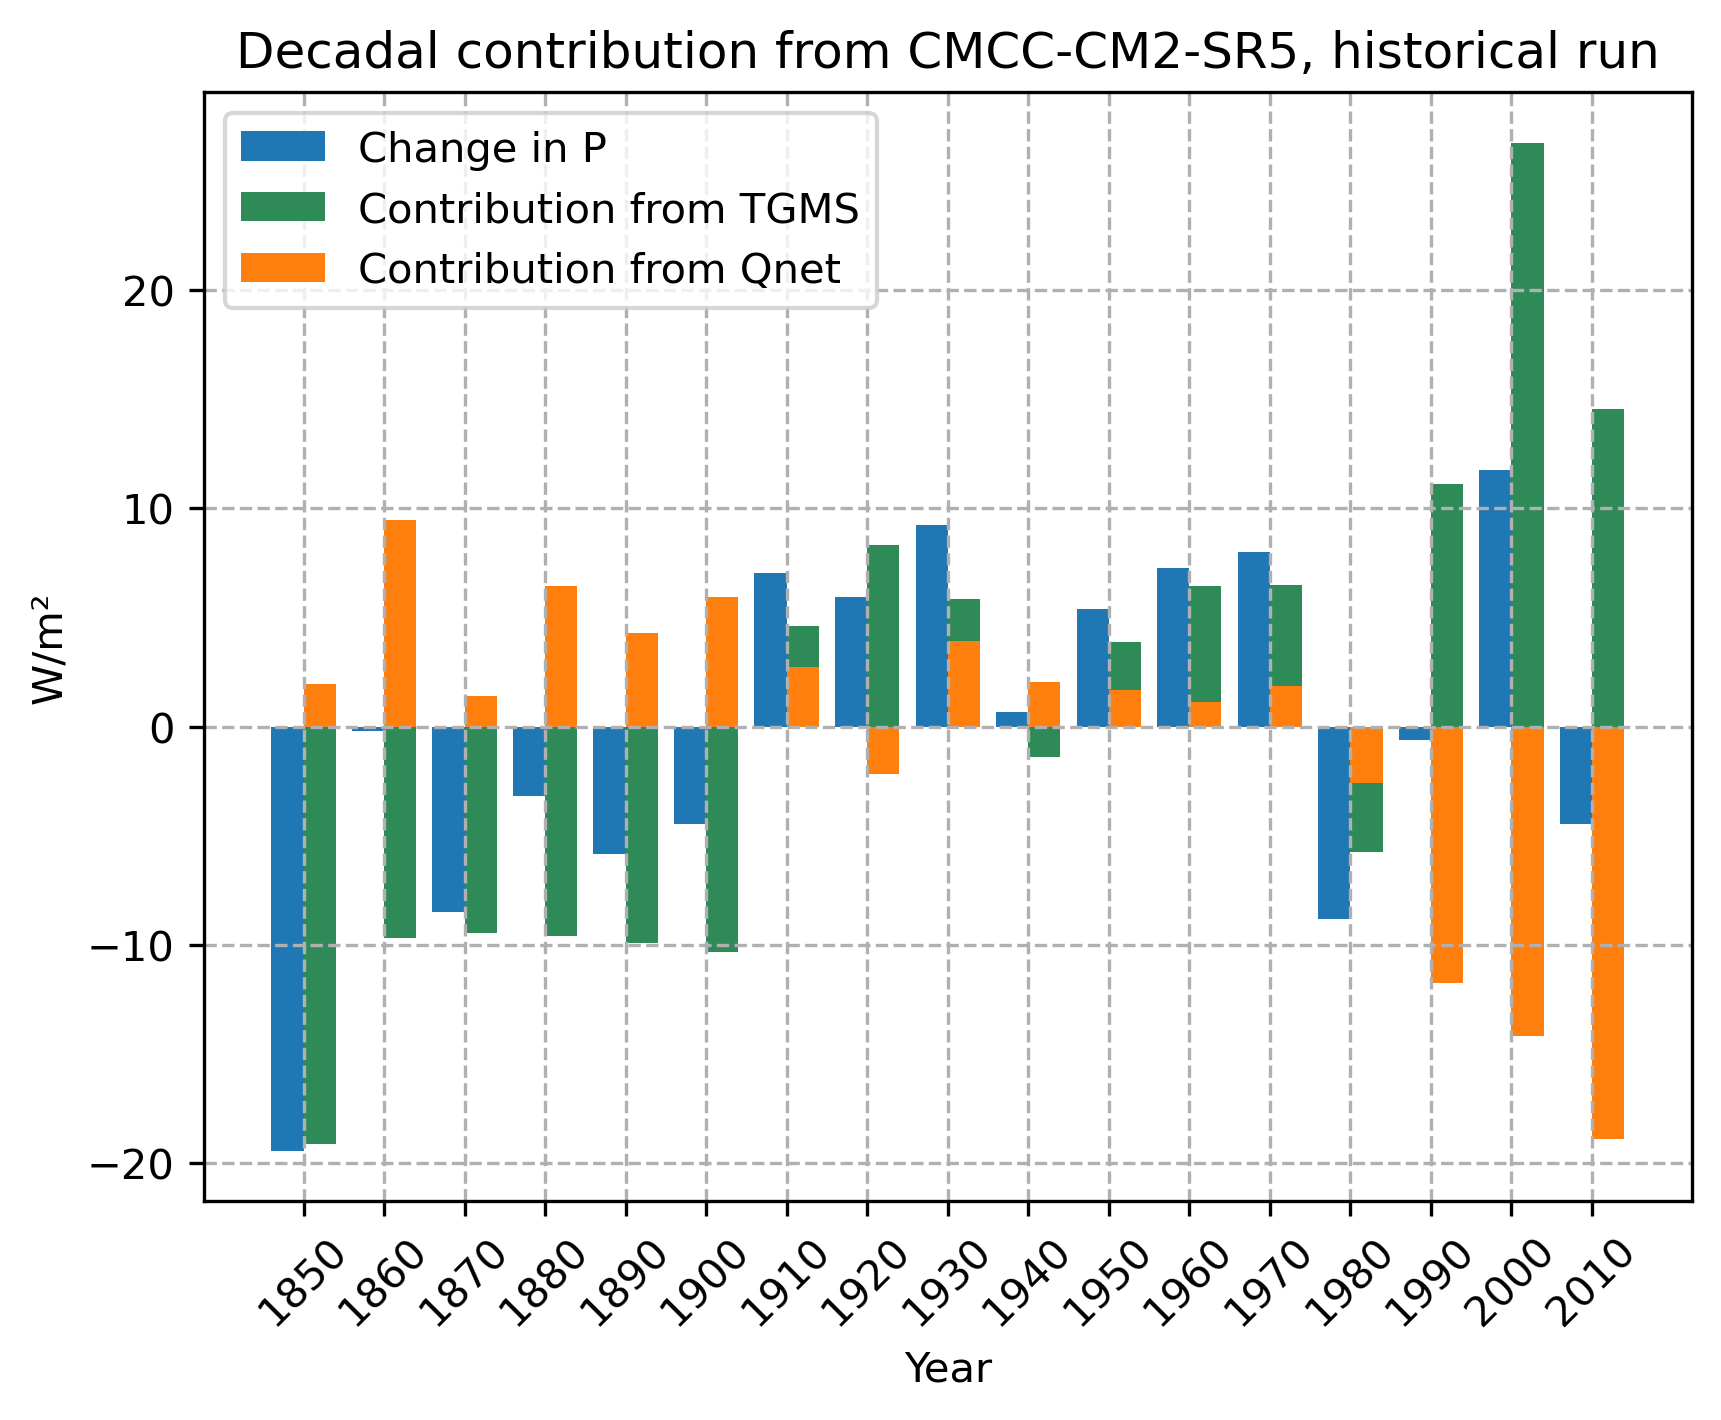

In [47]:
X = np.linspace(1850, 2010, 17, dtype='int')
#X = np.linspace(2020, 2100, 9, dtype='int')
arr = np.array(dP)
ind = X # the x locations for the groups
width = 4      # the width of the bars

plt.bar(ind-width/2, dP, width)
plt.bar(ind+width/2, Tcont, width, color='seagreen')
plt.bar(ind+width/2, Qcont, width, color='tab:orange')
plt.xticks(X, X, rotation=45)        #shows all the x labels
plt.xlabel('Year')
plt.ylabel('W/m\u00b2')
plt.title('Decadal contribution from CMCC-CM2-SR5, historical run')
plt.legend(['Change in P', 'Contribution from TGMS', 'Contribution from Qnet']) 
plt.grid(linestyle='--')
plt.show()